# ETL Project:

## Sources:

* Visualization on: https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
* Data on GitHub: https://github.com/CSSEGISandData/COVID-19

### Get COVID-19 data: 

1. We clone a repository from GitHub, URL: https://github.com/CSSEGISandData/COVID-19.git

2. We use information form: COVID-19/csse_covid_19_data/csse_covid_19_time_series

3. Files:

    * time_series_19-covid-Confirmed.csv
    * time_series_19-covid-Deaths.csv
    * time_series_19-covid-Recovered.csv

## Import Dependecies:

In [82]:
# Dependencies and Setup
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import seaborn as sns
from matplotlib.pyplot import *

# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')

## Extract CSV's into DataFrames

In [83]:
Confirmed_file = "time_series_19-covid-Confirmed.csv"
Confirmed_df = pd.read_csv(Confirmed_file)
Confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,989,989,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,400,400,410,410,411,413,414,414,418,418
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,294,294,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,102


In [84]:
Deaths_file = "time_series_19-covid-Deaths.csv"
Deaths_df = pd.read_csv(Deaths_file)
Deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,4,4,5,7,8,8,8,8,8,8
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [85]:
Recovered_file = "time_series_19-covid-Recovered.csv"
Recovered_df = pd.read_csv(Recovered_file)
Recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,712,744,792,821,868,873,917,936,956,970
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,...,215,235,248,257,271,276,282,288,297,297
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,372,384,401,422,438,450,469,490,502,512
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,199,218,228,235,243,247,255,260,270,277
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,80,81,81,82,82,84,85,86,87,87


## Unique Values: Country

In [86]:
Confirmed_df["Country/Region"].unique()

array(['Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan',
       'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France',
       'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain',
       'Belgium', 'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Denmark', 'Estonia', 'Netherlands', 'San Marino', 'Belarus',
       'Iceland', 'Lithuania', 'Mexico', 'New Zealand', 'Nigeria',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco',
       'Saudi Arabia', 'Senegal', 'Argentina', 'Chil

In [87]:
Deaths_df["Country/Region"].unique()

array(['Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan',
       'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France',
       'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain',
       'Belgium', 'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Denmark', 'Estonia', 'Netherlands', 'San Marino', 'Belarus',
       'Iceland', 'Lithuania', 'Mexico', 'New Zealand', 'Nigeria',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco',
       'Saudi Arabia', 'Senegal', 'Argentina', 'Chil

In [88]:
Recovered_df["Country/Region"].unique()

array(['Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan',
       'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France',
       'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain',
       'Belgium', 'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Denmark', 'Estonia', 'Netherlands', 'San Marino', 'Belarus',
       'Iceland', 'Lithuania', 'Mexico', 'New Zealand', 'Nigeria',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco',
       'Saudi Arabia', 'Senegal', 'Argentina', 'Chil

## Grouping by Country

### Confirmed

In [89]:
# Grouping Confirmed Cases:
Confirmed_df_group = Confirmed_df.groupby(['Country/Region'])

# By Country:
Confirmed_by_Country_df = Confirmed_df_group['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', 
                                            '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', 
                                            '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', 
                                            '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', 
                                            '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', 
                                            '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', 
                                            '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', 
                                            '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', 
                                            '3/3/20', '3/4/20', '3/5/20'].sum()
Confirmed_by_Country_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Algeria,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,3,5,12,12
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
Armenia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1


In [90]:
# Transpose Data Frame and Reset Indexes
Confirmed_by_Country_df = Confirmed_by_Country_df.T
Confirmed_by_Country_df = Confirmed_by_Country_df.reset_index()
Confirmed_by_Country_df = Confirmed_by_Country_df.rename(columns={"index": "Date"})
Confirmed_by_Country_df['Date'] = pd.to_datetime(Confirmed_by_Country_df['Date']).dt.strftime('%Y-%m-%d')
Confirmed_by_Country_df.head()

Country/Region,Date,Afghanistan,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Sweden,Switzerland,Taiwan,Thailand,Tunisia,UK,US,Ukraine,United Arab Emirates,Vietnam
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,1,2,0,0,1,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,1,3,0,0,1,0,0,2
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,3,5,0,0,2,0,0,2
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,3,7,0,0,2,0,0,2
4,2020-01-26,0,0,0,0,0,4,0,0,0,...,0,0,4,8,0,0,5,0,0,2


In [91]:
# Get Total Cases
Total_Cases = []
for row in range(len(Confirmed_by_Country_df)):
    Cases = sum(Confirmed_by_Country_df.iloc[row, 1:])
    Total_Cases.append(Cases)
# Add to Data Frame
Confirmed_by_Country_df['Total Cases'] = Total_Cases
Confirmed_by_Country_df.head()

Country/Region,Date,Afghanistan,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Switzerland,Taiwan,Thailand,Tunisia,UK,US,Ukraine,United Arab Emirates,Vietnam,Total Cases
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,1,2,0,0,1,0,0,0,555
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,1,3,0,0,1,0,0,2,653
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,3,5,0,0,2,0,0,2,941
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,3,7,0,0,2,0,0,2,1434
4,2020-01-26,0,0,0,0,0,4,0,0,0,...,0,4,8,0,0,5,0,0,2,2118


### Deaths

In [92]:
# Grouping Deaths Cases:
Deaths_df_group = Deaths_df.groupby(['Country/Region'])

# By Country:
Deaths_by_Country_df = Deaths_df_group['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', 
                                            '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', 
                                            '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', 
                                            '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', 
                                            '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', 
                                            '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', 
                                            '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', 
                                            '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', 
                                            '3/3/20', '3/4/20', '3/5/20'].sum()
Deaths_by_Country_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Armenia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# Transpose Data Frame and Reset Indexes
Deaths_by_Country_df = Deaths_by_Country_df.T
Deaths_by_Country_df = Deaths_by_Country_df.reset_index()
Deaths_by_Country_df = Deaths_by_Country_df.rename(columns={"index": "Date"})
Deaths_by_Country_df['Date'] = pd.to_datetime(Deaths_by_Country_df['Date']).dt.strftime('%Y-%m-%d')
Deaths_by_Country_df.head()

Country/Region,Date,Afghanistan,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Sweden,Switzerland,Taiwan,Thailand,Tunisia,UK,US,Ukraine,United Arab Emirates,Vietnam
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# Get Total Deaths
Total_Deaths = []
for row in range(len(Deaths_by_Country_df)):
    Cases = sum(Deaths_by_Country_df.iloc[row, 1:])
    Total_Deaths.append(Cases)
# Add to Data Frame
Deaths_by_Country_df['Total Deaths'] = Total_Deaths
Deaths_by_Country_df.head()

Country/Region,Date,Afghanistan,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Switzerland,Taiwan,Thailand,Tunisia,UK,US,Ukraine,United Arab Emirates,Vietnam,Total Deaths
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56


### Recovered

In [95]:
# Grouping Confirmed Cases:
Recovered_df_group = Recovered_df.groupby(['Country/Region'])

# By Country:
Recovered_by_Country_df = Recovered_df_group['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', 
                                            '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', 
                                            '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', 
                                            '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', 
                                            '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', 
                                            '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', 
                                            '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', 
                                            '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', 
                                            '3/3/20', '3/4/20', '3/5/20'].sum()
Recovered_by_Country_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Armenia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Transpose Data Frame and Reset Indexes
Recovered_by_Country_df = Recovered_by_Country_df.T
Recovered_by_Country_df = Recovered_by_Country_df.reset_index()
Recovered_by_Country_df = Recovered_by_Country_df.rename(columns={"index": "Date"})
Recovered_by_Country_df['Date'] = pd.to_datetime(Recovered_by_Country_df['Date']).dt.strftime('%Y-%m-%d')
Recovered_by_Country_df.head()

Country/Region,Date,Afghanistan,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Sweden,Switzerland,Taiwan,Thailand,Tunisia,UK,US,Ukraine,United Arab Emirates,Vietnam
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [97]:
# Get Total Deaths
Total_Recovered = []
for row in range(len(Recovered_by_Country_df)):
    Cases = sum(Recovered_by_Country_df.iloc[row, 1:])
    Total_Recovered.append(Cases)
# Add to Data Frame
Recovered_by_Country_df['Total Recovered'] = Total_Recovered
Recovered_by_Country_df.head()

Country/Region,Date,Afghanistan,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Switzerland,Taiwan,Thailand,Tunisia,UK,US,Ukraine,United Arab Emirates,Vietnam,Total Recovered
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,52


### Select DATA:

Add data from oter sources: https://upload.wikimedia.org/wikipedia/commons/f/fe/2019-nCoV_in_China.svgv

In [98]:
Covid_Cases_0 = pd.DataFrame(
    {"Date": ["2020-01-11", "2020-01-12", "2020-01-13", "2020-01-14", "2020-01-15", "2020-01-16", "2020-01-17",
              "2020-01-18", "2020-01-19", "2020-01-20", "2020-01-21"],
     "Total Cases": [41, 41, 41, 41, 41, 41, 45, 62, 198, 217, 314],
     "Total Deaths": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     "Total Recovered": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]})
Covid_Cases_0

,Date,Total Cases,Total Deaths,Total Recovered
0,2020-01-11,41,0,0
1,2020-01-12,41,0,0
2,2020-01-13,41,0,0
3,2020-01-14,41,0,0
4,2020-01-15,41,0,0
5,2020-01-16,41,0,0
6,2020-01-17,45,0,0
7,2020-01-18,62,0,0
8,2020-01-19,198,0,0
9,2020-01-20,217,0,0


In [125]:
Covid_Cases = Confirmed_by_Country_df[['Date', 'Total Cases']]
Covid_Cases['Total Deaths'] = Deaths_by_Country_df['Total Deaths']
Covid_Cases['Total Recovered'] = Recovered_by_Country_df['Total Recovered']
Covid_Cases.head()

Country/Region,Date,Total Cases,Total Deaths,Total Recovered
0,2020-01-22,555,17,28
1,2020-01-23,653,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52


In [126]:
Covid_Cases = Covid_Cases_0.append(Covid_Cases)
Covid_Cases = Covid_Cases.rename(columns={'Total Cases': 'Total_Cases'})
Covid_Cases["Date"]=pd.to_datetime(Covid_Cases["Date"])
Covid_Cases["Date"] = pd.to_datetime(Covid_Cases["Date"]).dt.strftime("%Y-%m-%d")
Covid_Cases.head()

Country/Region,Date,Total_Cases,Total Deaths,Total Recovered
0,2020-01-11,41,0,0
1,2020-01-12,41,0,0
2,2020-01-13,41,0,0
3,2020-01-14,41,0,0
4,2020-01-15,41,0,0


In [127]:
Covid_Cases.to_csv('Covid_Cases.csv', header=True, index=False)

# Add Oro.CSV and 10 yrs data management 

Source: Investing (URL:)

In [102]:
# Bajamos la base del oro
csv_path = "oro.csv"
base_oro = pd.read_csv(csv_path,encoding = "latin")
base_oro["Fecha"]=pd.to_datetime(base_oro["Fecha"])
base_oro.dtypes

Fecha       datetime64[ns]
Cierre             float64
Apertura           float64
Máximo             float64
Mínimo             float64
Vol.                object
% var.              object
dtype: object

Source: Federal Reserve, United States

In [103]:
# Bajamos la tasa de interes a 10 años
csv_path = "DGS10.csv"
base_DGS10 = pd.read_csv(csv_path,encoding = "latin")
base_DGS10

,DATE,DGS10
0,2015-03-05,2.11
1,2015-03-06,2.24
2,2015-03-09,2.20
3,2015-03-10,2.14
4,2015-03-11,2.11
...,...,...
1301,2020-02-28,1.13
1302,2020-03-02,1.10
1303,2020-03-03,1.02
1304,2020-03-04,1.02


In [104]:
# quitamos los registros que tienen .
base_DGS10["DGS10"]=base_DGS10["DGS10"].loc[base_DGS10["DGS10"]!='.']
#cambiamos el tipo a float
base_DGS10["DGS10"]=base_DGS10["DGS10"].astype(float)
# Cambiamos el tipo la fecha a fecha
base_DGS10["DATE"]=pd.to_datetime(base_DGS10["DATE"])
# Nos quedamos con los datos del 16 de dic de 2019 al 5 de marzo del 2020
base_DGS10=base_DGS10[base_DGS10["DATE"]>"2019-12-15"]
# Cambiamos el formato de la fecha
base_DGS10["DATE"] = pd.to_datetime(base_DGS10["DATE"]).dt.strftime("%d/%m/%Y")

In [105]:
base_DGS10=base_DGS10.rename(columns={'DATE': 'Fecha'})
base_DGS10["Fecha"]=pd.to_datetime(base_DGS10["Fecha"])

base_DGS10.head()

,Fecha,DGS10
1247,2019-12-16,1.89
1248,2019-12-17,1.89
1249,2019-12-18,1.92
1250,2019-12-19,1.92
1251,2019-12-20,1.92


In [106]:
# imprimir el largo
print(len(base_oro),"  ",len(base_DGS10))

62    59


In [107]:
base_oro.dtypes

Fecha       datetime64[ns]
Cierre             float64
Apertura           float64
Máximo             float64
Mínimo             float64
Vol.                object
% var.              object
dtype: object

In [108]:
base_DGS10.dtypes

Fecha    datetime64[ns]
DGS10           float64
dtype: object

In [109]:
# Juntas las dos bases
tabla1 = pd.merge(base_oro,base_DGS10, on="Fecha",how="outer")


In [110]:
tabla1.reset_index()
tabla1.set_index("Fecha")
tabla1.dtypes

Fecha       datetime64[ns]
Cierre             float64
Apertura           float64
Máximo             float64
Mínimo             float64
Vol.                object
% var.              object
DGS10              float64
dtype: object

In [111]:
tabla1["DGS10"]=tabla1["DGS10"].fillna(0)

ant=0

for index,row in tabla1.iterrows():
    if row["DGS10"]==0.00:
        row["DGS10"]=ant
        tabla1.iloc[index,:]=row
    ant=row["DGS10"]


In [112]:
tabla1.head()

,Fecha,Cierre,Apertura,Máximo,Mínimo,Vol.,% var.,DGS10
0,2019-12-16,1486.1,1485.8,1490.0,1483.4,2.83K,-0.05%,1.89
1,2019-12-17,1486.4,1486.0,1490.5,1484.3,10.20K,0.02%,1.89
2,2019-12-18,1484.4,1486.2,1489.4,1480.4,5.32K,-0.13%,1.92
3,2019-12-19,1490.0,1485.2,1491.3,1483.1,6.56K,0.38%,1.92
4,2019-12-20,1486.6,1488.6,1490.4,1485.2,1.45K,-0.23%,1.92


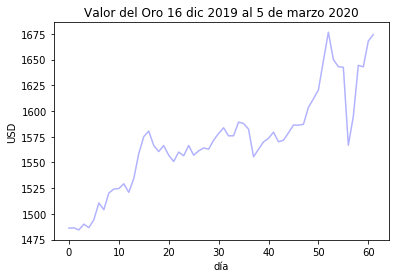

In [113]:
x_axis = np.arange(len(tabla1))
#

#plt.figure(figsize = (8, 5))
plt.plot(x_axis,tabla1["Cierre"], color="blue", alpha=.3)
plt.title("Valor del Oro 16 dic 2019 al 5 de marzo 2020")
plt.xlabel("día")
plt.ylabel("USD")
tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, base["DATE"],rotation=90)

# Save the Figure
plt.savefig("oro.jpg", bbox_inches='tight')

# Show the Figure
plt.show()

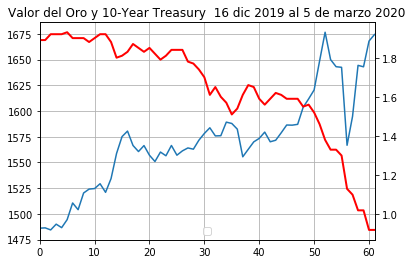

In [114]:
fig = plt.figure()
ax = tabla1['Cierre'].plot(kind='line',grid=True)
ax2 = ax.twinx()
ax2.plot(tabla1['DGS10'].values, linestyle='-', linewidth=2.0,color='red')
legend(['Oro', 'DGS10'])
plt.legend(handles=[ax, ax2], loc="lower center")
plt.title("Valor del Oro y 10-Year Treasury  16 dic 2019 al 5 de marzo 2020")
plt.show();

In [132]:
tabla1 = tabla1.rename(columns={'% var.': 'Var', 'Máximo': 'Maximo', 'Mínimo':'Minimo'})
tabla1["Fecha"] = pd.to_datetime(tabla1["Fecha"]).dt.strftime("%Y-%m-%d")
tabla1

,Fecha,Cierre,Apertura,Maximo,Minimo,Vol.,Var,DGS10
0,2019-12-16,1486.1,1485.80,1490.0,1483.40,2.83K,-0.05%,1.89
1,2019-12-17,1486.4,1486.00,1490.5,1484.30,10.20K,0.02%,1.89
2,2019-12-18,1484.4,1486.20,1489.4,1480.40,5.32K,-0.13%,1.92
3,2019-12-19,1490.0,1485.20,1491.3,1483.10,6.56K,0.38%,1.92
4,2019-12-20,1486.6,1488.60,1490.4,1485.20,1.45K,-0.23%,1.92
...,...,...,...,...,...,...,...,...
57,2020-02-03,1594.8,1592.80,1612.1,1576.30,443.53K,1.79%,1.10
58,2020-03-03,1644.4,1586.00,1650.5,1585.90,466.53K,3.11%,1.02
59,2020-04-03,1643.0,1640.10,1654.3,1632.60,313.34K,-0.09%,1.02
60,2020-05-03,1668.0,1638.20,1675.5,1635.60,363.00K,1.52%,0.92


In [133]:
tabla1.to_csv('tabla1.csv', header=True, index=False)

## Create database connection

In [134]:
connection_string = "postgres:postgres@localhost:5432/ETL_Project"
engine = create_engine(f'postgresql://{connection_string}')

## Confirm tables

In [135]:
engine.table_names()

['covid_cases', 'tabla1']

## Load DataFrames into database

In [136]:
Covid_Cases.to_sql(name = 'covid_cases', con = engine, if_exists = 'append', index = False)

In [137]:
tabla1.to_sql(name = 'tabla1', con = engine, if_exists = 'append', index = False)